# import lib


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from sklearn.metrics import accuracy_score


# load dataset

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

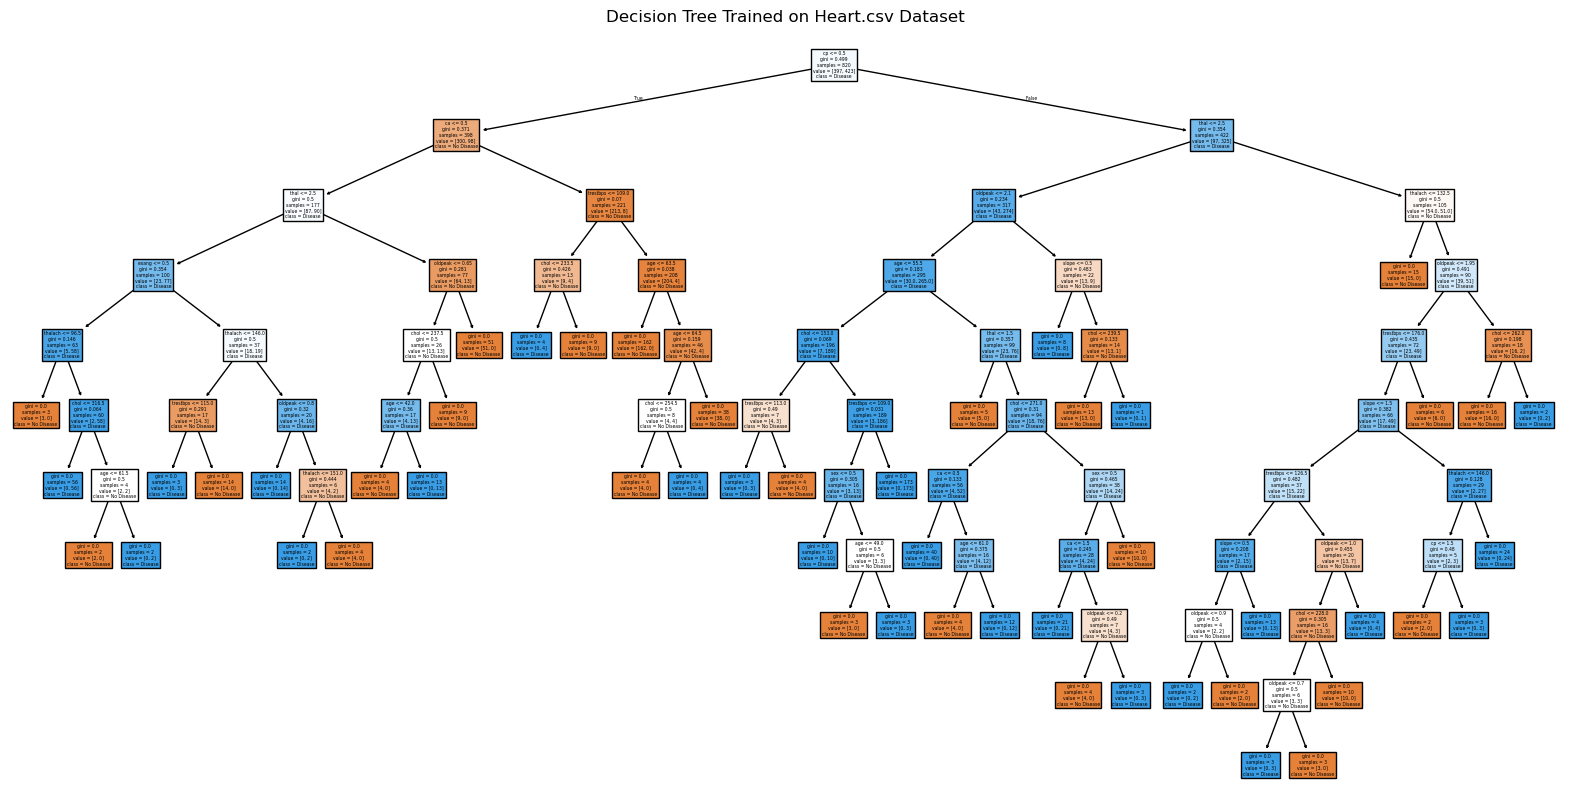

In [11]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split


# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into training and test sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title("Decision Tree Trained on Heart.csv Dataset")
plt.show()


# .Analyze overfitting and control tree depth and Train a Random Forest and compare accuracy

In [14]:
# Re-train with a depth limit
pruned_clf = DecisionTreeClassifier(max_depth=4, random_state=0)
pruned_clf.fit(X_train, y_train)

# Evaluate again
train_preds = pruned_clf.predict(X_train)
test_preds = pruned_clf.predict(X_test)

print("After Pruning:")
print(f"Training Accuracy: {accuracy_score(y_train, train_preds):.2f}")
print(f"Testing Accuracy: {accuracy_score(y_test, test_preds):.2f}")


After Pruning:
Training Accuracy: 0.88
Testing Accuracy: 0.80


# interpret feature importances

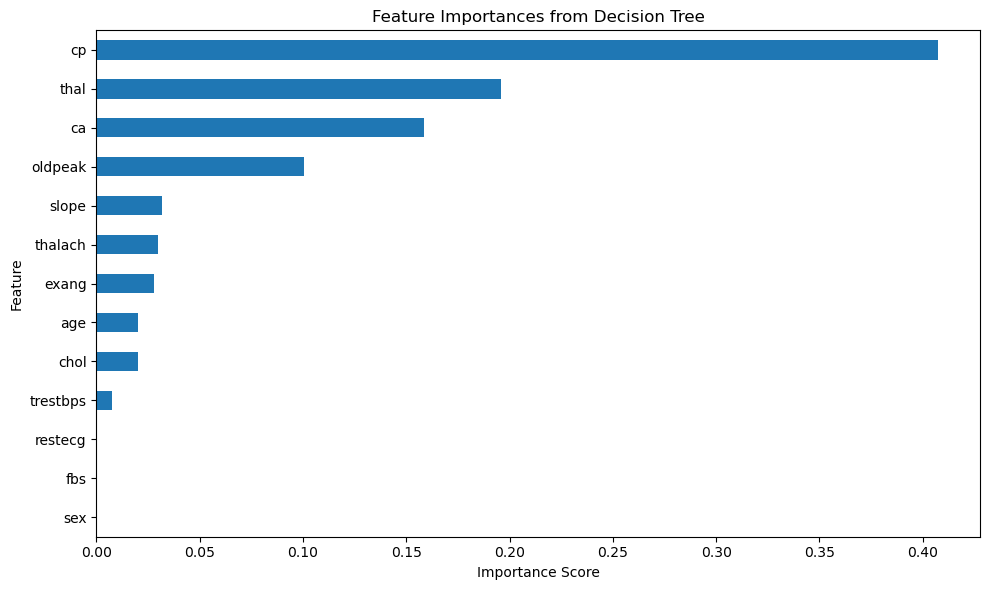

In [15]:


# Get feature importances
importances = pruned_clf.feature_importances_

# Create a DataFrame for better visualization
feat_importances = pd.Series(importances, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh')
plt.title('Feature Importances from Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


 # Evaluate using cross-validation.
